This notebook contains my practice notes and results of fast.ai's chaptar 2 of linear algebra: http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb

In [1]:
!pip install numpy
!pip install sklearn
!pip install scipy
!pip install matplotlib

    100% |████████████████████████████████| 12.2MB 64kB/s eta 0:00:01
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 4.9MB 155kB/s ta 0:00:011
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 31.2MB 23kB/s eta 0:00:011
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 12.6MB 62kB/s eta 0:00:011
    100% |████████████████████████████████| 512kB 817kB/s ta 0:00:01
    100% |███████████

### setting up

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plot

%matplotlib inline 
np.set_printoptions(suppress=True)

### set train and test data

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

### Get some glimps of data

In [4]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

### extract word frequency matrix (bag of words)

In [5]:
# using sklearn to extract frequency matrix
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# specify the stopwords rule to be used when creating an instance of CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
# see newsgroups train data
print(newsgroups_train.data[0], len(newsgroups_train.data))
# create documents X words Matrix (bag of words Matrix)
vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors) # its numpy compressed sparse metrix into a single row
# convert the sparse matrix to dense matrix
vectors = vectors.todense()
print(vectors, vectors.shape)

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 2034
  (0, 21025)	1
  (0, 3998)	1
  (0, 5546)	1
  (0, 10605)	2
  (0, 20973)	1
  (0, 19841)	1
  (0, 2408)	1
  (0, 14706)	1
  (0, 20977)	1
  (0, 23828)	2
  (0, 21208)	1
  (0, 15301)	1
  (0, 21084)	1
  (0, 9848)	1
  (0, 22878)	1
  (0, 13023)	2
  (0, 14154)	1
  (0, 8554)	2
  (0, 18949)	1
  (0, 18704)	1
  (0, 19066)	3
  (0, 17464)	2
  (0, 18699)	1
  (0, 7698)	1
  (0, 11203)	1
  :	:
  (2032, 58

In [7]:
# get vocabulary dictionary
vocab = np.array(vectorizer.get_feature_names())
print(vocab, '\n', vocab.shape, '\n', vocab[7000:7020])

['00' '000' '0000' ... 'zware' 'zwarte' 'zyxel'] 
 (26576,) 
 ['cosmonauts' 'cosmos' 'cosponsored' 'cost' 'costa' 'costar' 'costing'
 'costly' 'costruction' 'costs' 'cosy' 'cote' 'couched' 'couldn' 'council'
 'councils' 'counsel' 'counselees' 'counselor' 'count']


### Singular Value Decomposition (SVD)

**Idea:** In this document classification problem, we assume each document is can be classified into any of the categories provided purely based on the words used in it. Each distinguishing word in a document from another contributes to the determination of class label to which it belongs.

In Linear Algebra perspective, the features of each topic to be orthonormal. SVD helps us to factorize a single matrix into three matrices - one matrix with orthogonal columns, one with orthogonal rows and another diagonal matrix with relative importance of each factor.

**Notes from fast.ai notebook:** 
- SVD is an **exact decomposition** => the matrices it creates are big enough to fully cover the original martix.
- SVD applications: semantic analysis, collaborative filtering/recommendations, calculate Moore-Penrose pseudoinverse, data compression, principal component analysis.

In [ ]:
# apply SVD to our 'vectors' (Document-Term matrix).
%time U, s, Vh = linalg.svd(vectors) # SVD: A = U.S.Vh

In [8]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False) # SVD: A = U.S.Vh

CPU times: user 1min 55s, sys: 18.5 s, total: 2min 14s
Wall time: 37.2 s


- consider our Document-Term matrix is of size M X N. Then,
- `full_matrices=True` by default gives U of size M X M and Vh of size N X N.
- `full_matrices=False` gives U of size M X min(M,N) and Vh of size min(M,N) X N

In [9]:
# Let's verify,
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


Let's **confirm this is a decomposition of the input.**

In [10]:
US = np.dot(U, np.diag(s))
USVh = np.dot(US, Vh)
print(USVh.shape, vectors.shape) # see if the shapes match
print(np.linalg.norm(vectors - USVh)) # see if the difference between matrices is negligible
print(np.allclose(vectors, USVh)) # see if the matrices are close

(2034, 26576) (2034, 26576)
2.9690515388840644e-12
True


Let's **Confirm that U, V are orthonormal**

In [11]:
# If a matrix A is orthonormal, then A.(Atranspose) is Identity matrix
UUt = np.dot(U, np.transpose(U))
print(UUt)
VhVht = np.dot(Vh, np.transpose(Vh))
print(VhVht)
print(np.allclose(UUt, np.eye(UUt.shape[0])), np.allclose(VhVht, np.eye(VhVht.shape[0])))

[[ 1. -0.  0. ...  0.  0.  0.]
 [-0.  1.  0. ...  0. -0.  0.]
 [ 0.  0.  1. ...  0. -0.  0.]
 ...
 [ 0.  0.  0. ...  1. -0.  0.]
 [ 0. -0. -0. ... -0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[[ 1.  0. -0. ... -0.  0.  0.]
 [ 0.  1. -0. ... -0. -0.  0.]
 [-0. -0.  1. ...  0.  0. -0.]
 ...
 [-0. -0.  0. ...  1. -0. -0.]
 [ 0. -0.  0. ... -0.  1. -0.]
 [ 0.  0. -0. ... -0. -0.  1.]]
True True


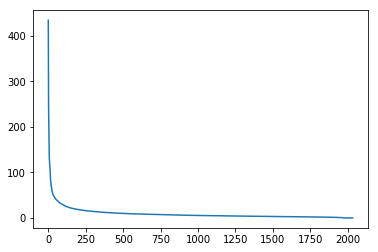

In [12]:
# plot the values of 's' to see how the importance values are distributed
plot.plot(s)

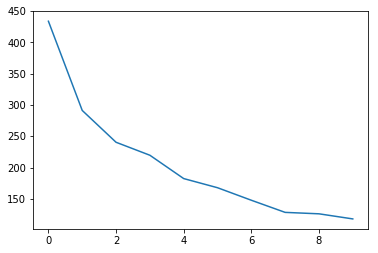

In [13]:
# what about first 10 values
plot.plot(s[:10])

**what's that we're seeing?** The above plots of vector `s` (vector of eigen values) shows that, the importance of vectors in `U` and `Vh` (eigen vectors) is decreasing exponentially as we move to the right (`U`) or down (`Vh`) respectively. In plot 2, we can see the most effective part lies within the first 10 columns (`U`) or rows (`Vh`) respectively.

In [29]:
print(Vh.shape, Vh[:10].shape)

# this is a rewritten (fast.ai notebook's having a different version) code for better understandability.
for t in Vh[:10]:
    sorted8 = np.argsort(t)[:-8:-1]
    topic_words = []
    for i in sorted8:
        topic_words.append(vocab[i])
    print(topic_words)

(2034, 26576) (10, 26576)
['ditto', 'critus', 'propagandist', 'surname', 'galacticentric', 'kindergarten', 'surreal']
['jpeg', 'gif', 'file', 'color', 'quality', 'image', 'jfif']
['graphics', 'edu', 'pub', 'mail', '128', '3d', 'ray']
['jesus', 'god', 'matthew', 'people', 'atheists', 'atheism', 'does']
['image', 'data', 'processing', 'analysis', 'software', 'available', 'tools']
['god', 'atheists', 'atheism', 'religious', 'believe', 'religion', 'argument']
['space', 'nasa', 'lunar', 'mars', 'probe', 'moon', 'missions']
['image', 'probe', 'surface', 'lunar', 'mars', 'probes', 'moon']
['argument', 'fallacy', 'conclusion', 'example', 'true', 'ad', 'argumentum']
['space', 'larson', 'image', 'theory', 'universe', 'physical', 'nasa']


**what we're seeing here?** The above code is loading the first 10 row vectors in `Vh`, and each vector is sorted within based on their actual value. Why we're doing this? I don't know! But when we look at the corresponding words it represents, wow! we got a nice cluster of words which denotes each topic that we're interested in.

#### So the takeaway is, SVD can be used as an Unsupervised Clustering tool. 

### Non-negative Matrix Factorization (NMF)